
**EXOPLANET DETECTION USING DIFFERENT MACHINE LEARNING MODELS** (By Shadan Ahamd)

Extrasolar planets, or exoplanets, are celestial bodies that are located outside of our solar system. In the last twenty years, scientists have made incredible progress in finding these far-off worlds, and NASA's ground-breaking Kepler Space Telescope has been instrumental in these findings.

We will be using the data that was found out with the help of kepler telescope to train different ML models to predict if that celestial body is an exoplanet or not.

First we will be importing libraries that we will be used in training the machine learning model, also visualizing in data preprocessing as well as to visualize the machine learning model outcomes.

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will now be reading the data csv file with the help of pandas library.

In [220]:
train_data = pd.read_csv('/content/drive/MyDrive/exoTrain.csv')

Now let's see how our data looks like by printing out some of the data values.

In [221]:
train_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


As we can see that the label column tells about if it is an exoplanet or not, 1 for not an exoplanet and 2 for it is an exoplanet. and other colums tells about the flux for that celestial body.

we will we using those flux values to train out ML model.


We will be converting the label to binary values. So, it will be easier processing of data.

In [222]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]

Lets check the changed values

In [223]:
print(train_data['LABEL'])

0       1
1       1
2       1
3       1
4       1
       ..
5082    0
5083    0
5084    0
5085    0
5086    0
Name: LABEL, Length: 5087, dtype: int64


Now lets visualize the label column in the dataset to get an idea about the class distribution.

In [224]:
print(train_data['LABEL'].value_counts())

LABEL
0    5050
1      37
Name: count, dtype: int64


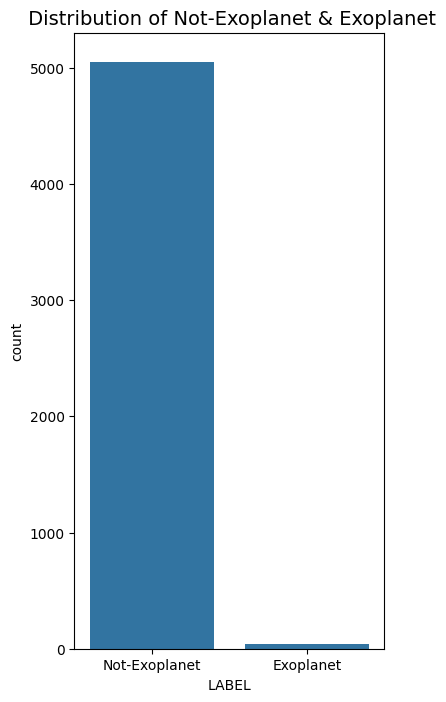

In [225]:
plt.figure(figsize=(4, 8))
sns.countplot(x='LABEL', data=train_data)
plt.title(' Distribution of Not-Exoplanet & Exoplanet', fontsize=14)
plt.xticks([0, 1], ['Not-Exoplanet', 'Exoplanet'])
plt.show()

It turns out that the data is highly imbalanced so later on we'll be using some sampling techniques like smote to balance the data.

Now lets check for any null values in the dataset have any

In [226]:
if train_data.isnull().values.any():
    print("There are null values.")
    print(train_data.isnull().sum())
else:
    print("There are no null values.")

There are no null values.


Plotting graph for no exoplanet and for atlest 1 exoplanet

In [238]:
def flux_graph(dataset, row, dataframe, planet):
  fig = plt.figure(figsize=(10,5))
  ax = fig.add_subplot()
  ax.set_title(planet, fontsize=22)
  ax.set_xlabel('time', fontsize=17)
  ax.set_ylabel('flux', fontsize=17)
  ax.grid(False)
  if dataframe:
    flux_time = list(dataset.columns)
    flux_values = dataset[flux_time].iloc[row]
  else:
    flux_values = dataset[row]
  ax.plot(range(1, len(flux_values) + 1),flux_values)
  ax.tick_params(colors='black', labelsize=14)
  plt.show()


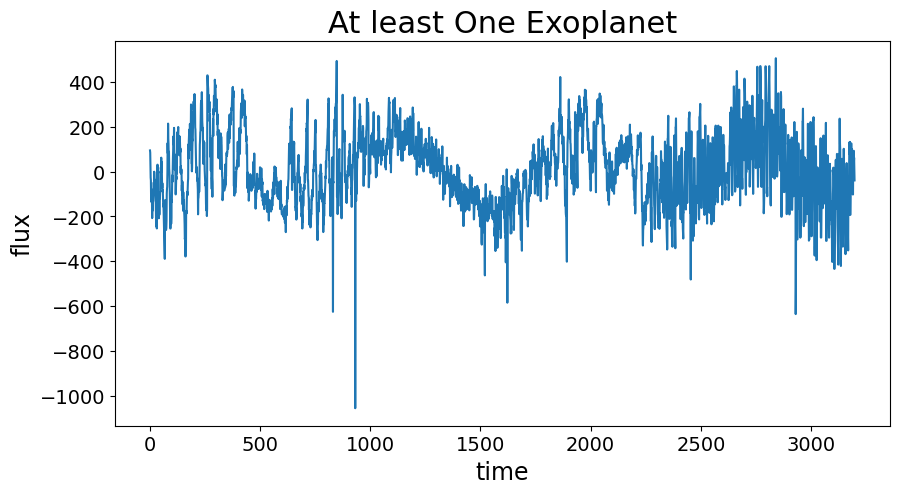

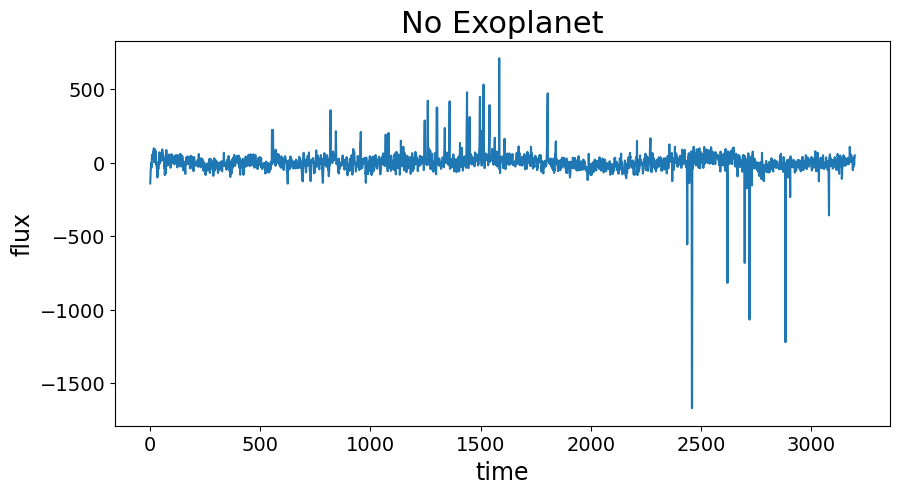

In [239]:
def display_flux(dataframe, dataset):
  with_planet = train_data[train_data['LABEL'] == 1].head(1).index
  wo_planet = train_data[train_data['LABEL'] == 0].head(1).index
  for row in with_planet:
    flux_graph(dataset, row, dataframe, planet = 'At least One Exoplanet')
  for row in wo_planet:
    flux_graph(dataset, row, dataframe, planet = 'No Exoplanet')
display_flux(True, dataset = train_data.loc[:, train_data.columns !='LABEL'])

Ploting for summary statistics (mean, median, variance) of flux signals for "Exoplanet" vs. "No Exoplanet."

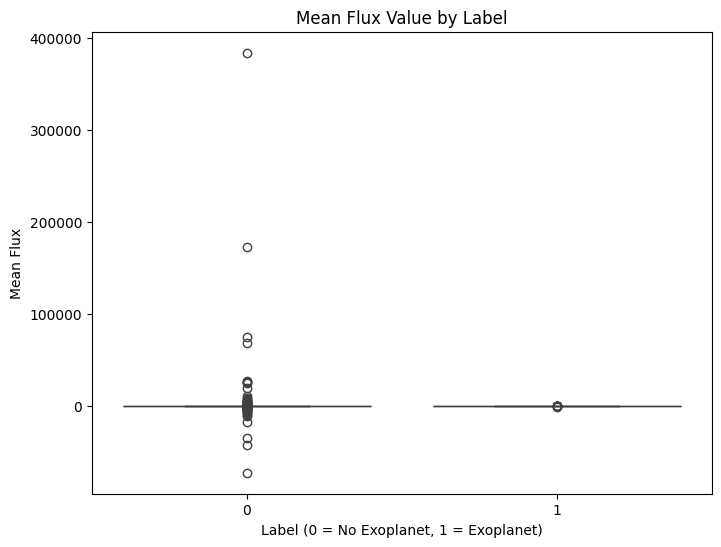

In [210]:
# Calculate summary stats
train_data['mean_flux'] = train_data.drop(columns='LABEL').mean(axis=1)
train_data['std_flux'] = train_data.drop(columns='LABEL').std(axis=1)

# Box plot for mean flux
plt.figure(figsize=(8, 6))
sns.boxplot(x='LABEL', y='mean_flux', data=train_data)
plt.title("Mean Flux Value by Label")
plt.xlabel("Label (0 = No Exoplanet, 1 = Exoplanet)")
plt.ylabel("Mean Flux")
plt.show()

Now lets visualize the flux values for exoplanets and for those that are not exoplanets.

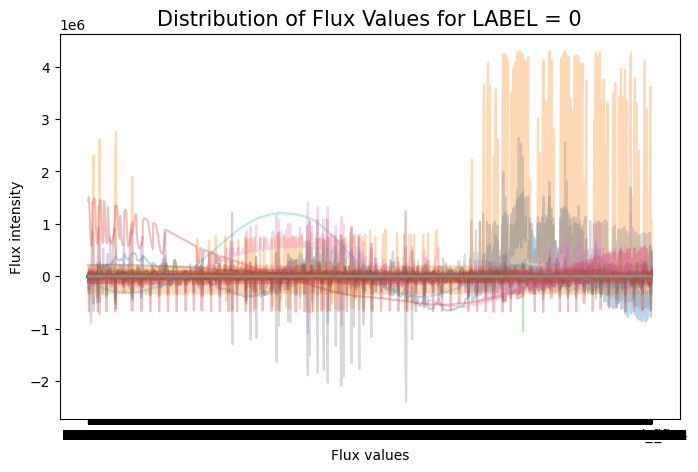

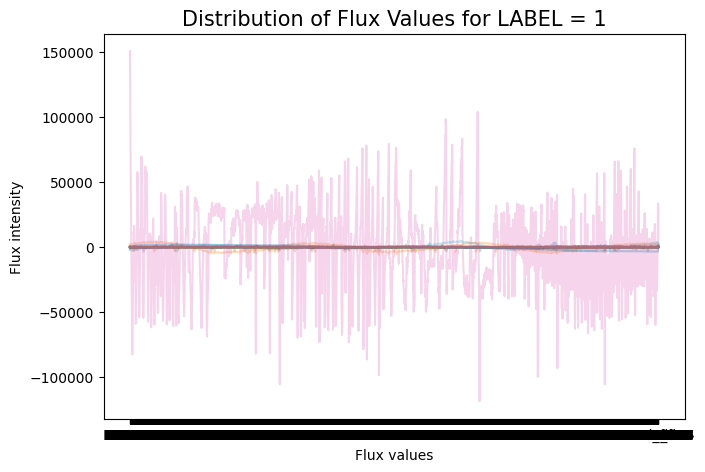

In [211]:
# Separate data based on LABEL values
label_0_data = train_data[train_data['LABEL'] == 0]
label_1_data = train_data[train_data['LABEL'] == 1]

# Plot for LABEL = 0
plt.figure(figsize=(8, 5))
plt.title('Distribution of Flux Values for LABEL = 0', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')

for i in range(label_0_data.shape[0]):
    plt.plot(label_0_data.iloc[i, :].drop('LABEL'), alpha=0.3)  # Exclude the LABEL column

plt.show()

# Plot for LABEL = 1
plt.figure(figsize=(7.5,5))
plt.title('Distribution of Flux Values for LABEL = 1', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')

for i in range(label_1_data.shape[0]):
    plt.plot(label_1_data.iloc[i, :].drop('LABEL'), alpha=0.3)  # Exclude the LABEL column

plt.show()


Remove the Outlier for exoplanet dataset

In [240]:
mask = (train_data["LABEL"]==1) & (train_data.iloc[:, 1:].gt(100000).any(axis=1))
train_data = train_data[~mask]
mask1 = (train_data["LABEL"]==0) & (train_data.iloc[:, 1:].gt(400000).any(axis=1))
train_data = train_data[~mask1]

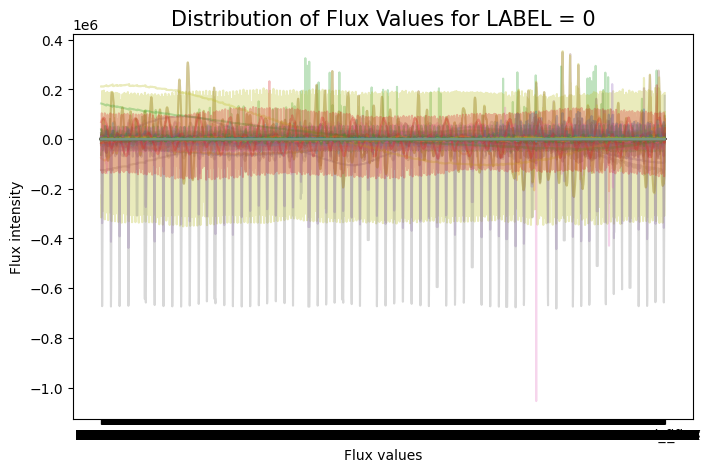

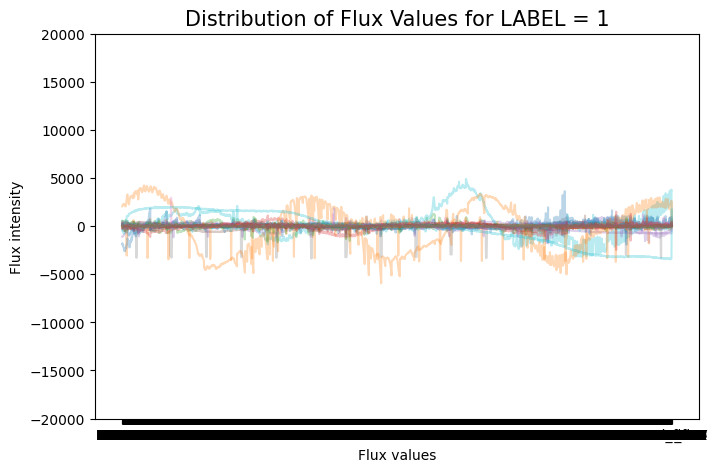

In [213]:
# Separate data based on LABEL values
label_0_data = train_data[train_data['LABEL'] == 0]
label_1_data = train_data[train_data['LABEL'] == 1]

# Plot for LABEL = 0
plt.figure(figsize=(8, 5))
plt.title('Distribution of Flux Values for LABEL = 0', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')

for i in range(label_0_data.shape[0]):
    plt.plot(label_0_data.iloc[i, :].drop('LABEL'), alpha=0.3)  # Exclude the LABEL column

plt.show()

# Plot for LABEL = 1
plt.figure(figsize=(7.8, 5))
plt.ylim(-20000,20000)
plt.title('Distribution of Flux Values for LABEL = 1', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')

for i in range(label_1_data.shape[0]):
    plt.plot(label_1_data.iloc[i, :].drop('LABEL'), alpha=0.3)  # Exclude the LABEL column

plt.show()

Now we move on to  spliting our dataset and normalize it.

In [241]:
X = train_data.drop(["LABEL"],axis=1)
y = train_data["LABEL"]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [243]:
x_train = normalized = normalize(X_train)
x_test = normalize(X_test)

we use feature scaling so that all the values remain in the comparable range.

In [244]:
#Feature scaling
std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

We will be first using decision tree to check and get the idea how our dataset will perform on machine learning alorithm.

Validation accuracy of Decision Tree is 0.9862204724409449

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1008
           1       0.12      0.12      0.12         8

    accuracy                           0.99      1016
   macro avg       0.56      0.56      0.56      1016
weighted avg       0.99      0.99      0.99      1016



Text(0.5, 1.0, 'CONFUSION MATRIX')

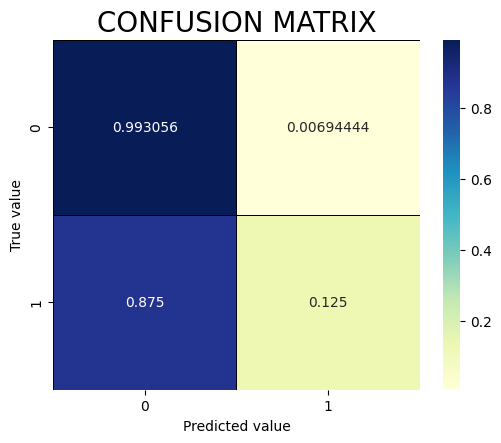

In [245]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(X_train,y_train)

prediction=ds_model.predict(X_test)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction,normalize='true'),annot=True,cmap='YlGnBu',fmt='g',linecolor="k",linewidths=0.5)
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.title("CONFUSION MATRIX",fontsize=20)

As we can see that we are getting high vaidation accuracy, but it is incorrectly depected as the accuracy for exoplanets is very low i.e 17%, this is because it is an highly imbalance data, so we will be making the dataset balanced first and then apply our techniques.

Balancing the class using SMOTE

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [246]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(train_data.drop('LABEL',axis=1), train_data['LABEL'])
ov_train_y = ov_train_y.astype('int')

print("Original class distribution:\n", train_data['LABEL'].value_counts())
print("Resampled class distribution:\n", ov_train_y.value_counts())

Original class distribution:
 LABEL
0    5040
1      36
Name: count, dtype: int64
Resampled class distribution:
 LABEL
1    5040
0    5040
Name: count, dtype: int64


now we will again split the dataset that we got after balancing the dataset using smote.

In [247]:
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.2, random_state=42)

we will again standerdize the new dataset

In [248]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

Now lets again use decision tree to see the results.

Validation accuracy of Decision Tree is 0.939484126984127

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       983
           1       0.90      0.99      0.94      1033

    accuracy                           0.94      2016
   macro avg       0.94      0.94      0.94      2016
weighted avg       0.94      0.94      0.94      2016



Text(0.5, 1.0, 'CONFUSION MATRIX')

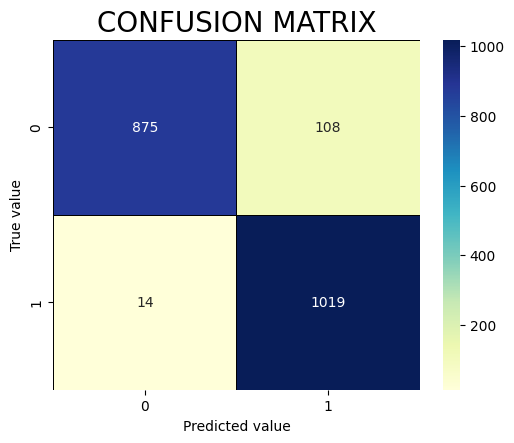

In [252]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(X_train_scaled,train_y)

prediction=ds_model.predict(X_test_scaled)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap='YlGnBu',fmt='g',linecolor="k",linewidths=0.5)
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.title("CONFUSION MATRIX",fontsize=20)

This result is very good now, as accuracy, recall and f1 score all are giving good results.

we can also try using KNN and see the results.

Validation accuracy of KNN is 0.9836309523809523

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       983
           1       0.97      1.00      0.98      1033

    accuracy                           0.98      2016
   macro avg       0.98      0.98      0.98      2016
weighted avg       0.98      0.98      0.98      2016



Text(0.5, 1.0, 'CONFUSION MATRIX')

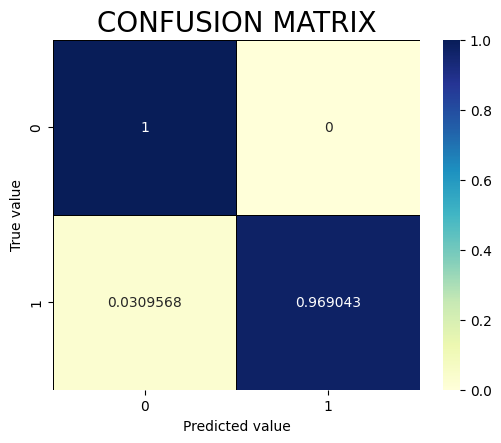

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(X_train_scaled,train_y)

prediction=knn_model.predict(X_test_scaled)

print('Validation accuracy of KNN is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(prediction,test_y, normalize='true'),annot=True,cmap='YlGnBu',fmt='g',linecolor="k",linewidths=0.5)
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.title("CONFUSION MATRIX",fontsize=20)

this result is even better than decision tree method.

We will now use even more powerfull method keras using tensorflow.

first we will import the required libraries from tensorflow

In [175]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

We will again use smote to balance the dataset

In [176]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Original class distribution:\n", train_data['LABEL'].value_counts())
print("Resampled class distribution:\n", y_smote.value_counts())

Original class distribution:
 LABEL
0    5040
1      36
Name: count, dtype: int64
Resampled class distribution:
 LABEL
1    5040
0    5040
Name: count, dtype: int64


Now we split the dataset

In [177]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)


we use feature scaling so that all the values remain in the comparable range.

In [178]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

We will define a model structure with an input layer

In [180]:
input_shape = X_train_scaled.shape[1]
model = Sequential([
    Input(shape=(input_shape,)),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

compiling the model

In [181]:
# Compile the model
optimizer = RMSprop(learning_rate=0.00005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

Training the model

we will be using a early stop method if same accuracy is being the output for a long time, we will use val_loss for this purpose.

In [182]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=75, batch_size=64,validation_data=(X_val_scaled, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/75
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5085 - auc_6: 0.5189 - loss: 0.8788 - val_accuracy: 0.5015 - val_auc_6: 0.6268 - val_loss: 0.7011
Epoch 2/75
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5352 - auc_6: 0.5614 - loss: 0.8246 - val_accuracy: 0.5179 - val_auc_6: 0.6752 - val_loss: 0.6913
Epoch 3/75
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5760 - auc_6: 0.6073 - loss: 0.7615 - val_accuracy: 0.5977 - val_auc_6: 0.7492 - val_loss: 0.6842
Epoch 4/75
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5872 - auc_6: 0.6261 - loss: 0.7435 - val_accuracy: 0.6334 - val_auc_6: 0.8438 - val_loss: 0.6721
Epoch 5/75
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6295 - auc_6: 0.6670 - loss: 0.7009 - val_accuracy: 0.7857 - val_auc_6: 0.9007 - val_loss: 0.6578
Epoch 6/75
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6647 - auc_6: 0.7180 - loss: 0.6566 - val_accuracy: 0.6329 - val_auc_6: 0.9359 - val_loss: 0.6410
Epoch 7/75
126/

Now plotting the graph for training accuracy and loss

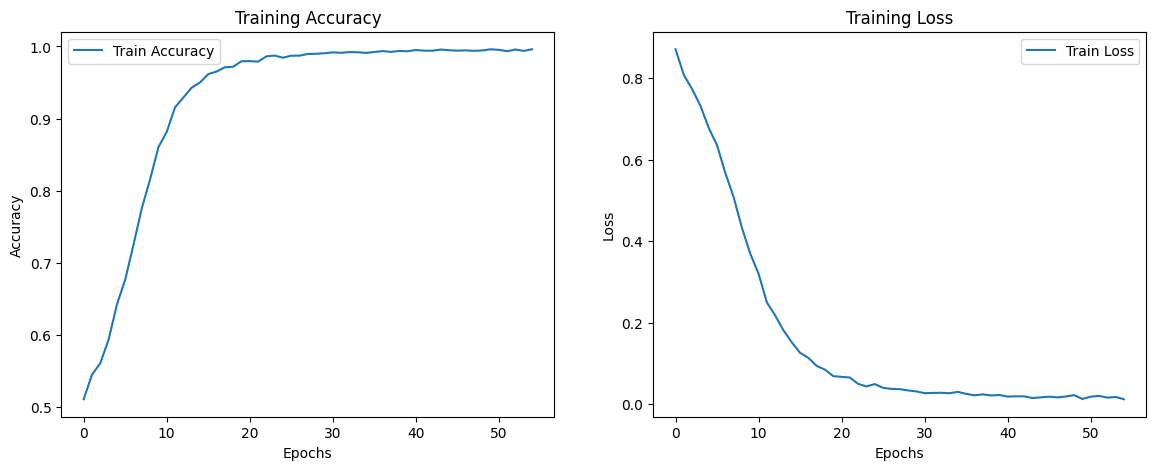

In [183]:
plt.figure(figsize=(14, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now we will find the AUC score for more accuate validation score.
also we will print the classification report for precision, recall f1-socre.

In [146]:
y_pred_prob = model.predict(X_val_scaled)
auc_score = roc_auc_score(y_val, y_pred_prob)
print("AUC Score on Validation Set:", auc_score)

# Classification report at a 0.4 threshold
y_pred = (y_pred_prob > 0.4).astype(int)
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=['No Exoplanet', 'Exoplanet']))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC Score on Validation Set: 0.9991585175736961

Classification Report:
               precision    recall  f1-score   support

No Exoplanet       1.00      0.99      1.00      1008
   Exoplanet       0.99      1.00      1.00      1008

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016



we will also plot a confusion matrix for bettter visualization.

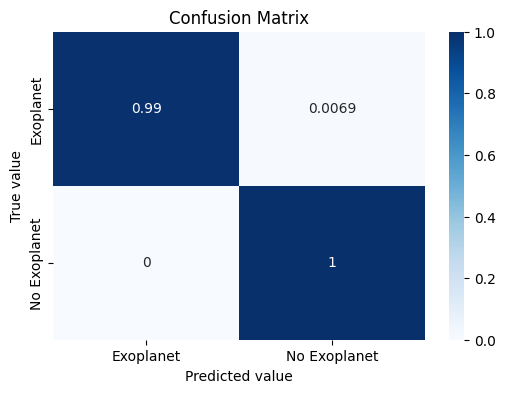

In [253]:
conf_matrix = confusion_matrix(y_val, y_pred, normalize='true')

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=['Exoplanet','No Exoplanet'], yticklabels=['Exoplanet','No Exoplanet'])
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.title("Confusion Matrix")
plt.show()

After using different models we have achived a great accuracy score. So we can say that we can our models are performing greatly.